# 1.Data Exploration

In [1]:
# load the libraries
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
Titanic = pd.read_csv(r"E:\EXCELR\ASSIGNMENTS\ASSIGNMENT 6 - Logistic regression\Titanic_train.csv")
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Titanic.shape

(891, 12)

In [5]:
Titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2.Data Preprocessing

In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Handle categorical variables: convert them into numerical values
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in Titanic.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    Titanic[column] = label_encoders[column].fit_transform(Titanic[column])
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [9]:
Titanic = Titanic.dropna()
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,684,0,39.0,0,5,480,29.1250,147,1
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [10]:
Titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [11]:
Titanic.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.029340,-0.035349,-0.020563,0.024575,0.036847,-0.082398,-0.011617,-0.050895,0.009592,-0.036443,-0.001873
Survived,0.029340,1.000000,-0.359653,-0.036666,-0.538826,-0.077221,-0.017358,0.093317,-0.147710,0.268189,-0.272453,-0.174692
Pclass,-0.035349,-0.359653,1.000000,-0.001854,0.155460,-0.369226,0.067247,0.025683,0.315897,-0.554182,0.692585,0.234857
Name,-0.020563,-0.036666,-0.001854,1.000000,-0.008229,0.062583,-0.083063,-0.031924,0.014055,-0.031997,0.052952,0.012324
Sex,0.024575,-0.538826,0.155460,-0.008229,1.000000,0.093254,-0.103950,-0.246972,0.072565,-0.184994,0.112896,0.102239
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252
SibSp,-0.082398,-0.017358,0.067247,-0.083063,-0.103950,-0.308247,1.000000,0.383820,0.002864,0.138329,0.038370,0.030121
Parch,-0.011617,0.093317,0.025683,-0.031924,-0.246972,-0.189119,0.383820,1.000000,-0.001576,0.205119,-0.026682,0.009197
Ticket,-0.050895,-0.147710,0.315897,0.014055,0.072565,-0.075934,0.002864,-0.001576,1.000000,-0.028720,0.219424,-0.031119
Fare,0.009592,0.268189,-0.554182,-0.031997,-0.184994,0.096067,0.138329,0.205119,-0.028720,1.000000,-0.522691,-0.277620


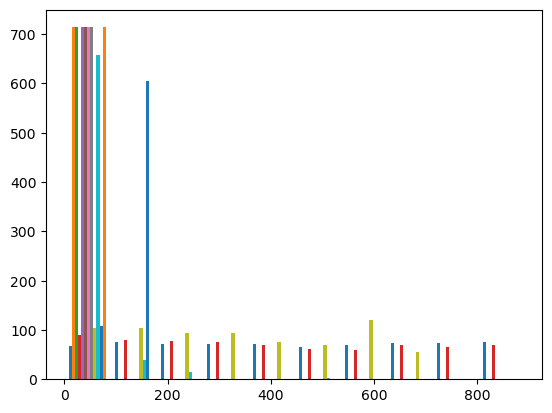

In [12]:
plt.hist(Titanic)
plt.show()

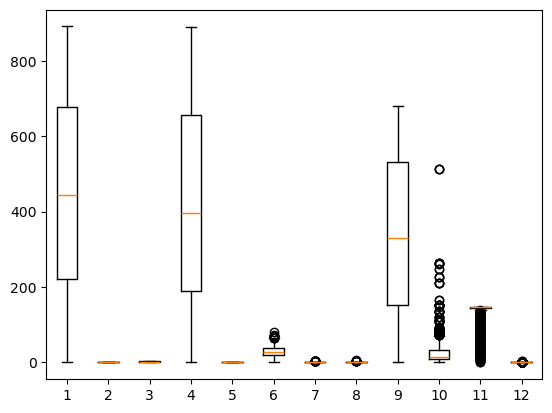

In [13]:
plt.boxplot(Titanic)
plt.show()

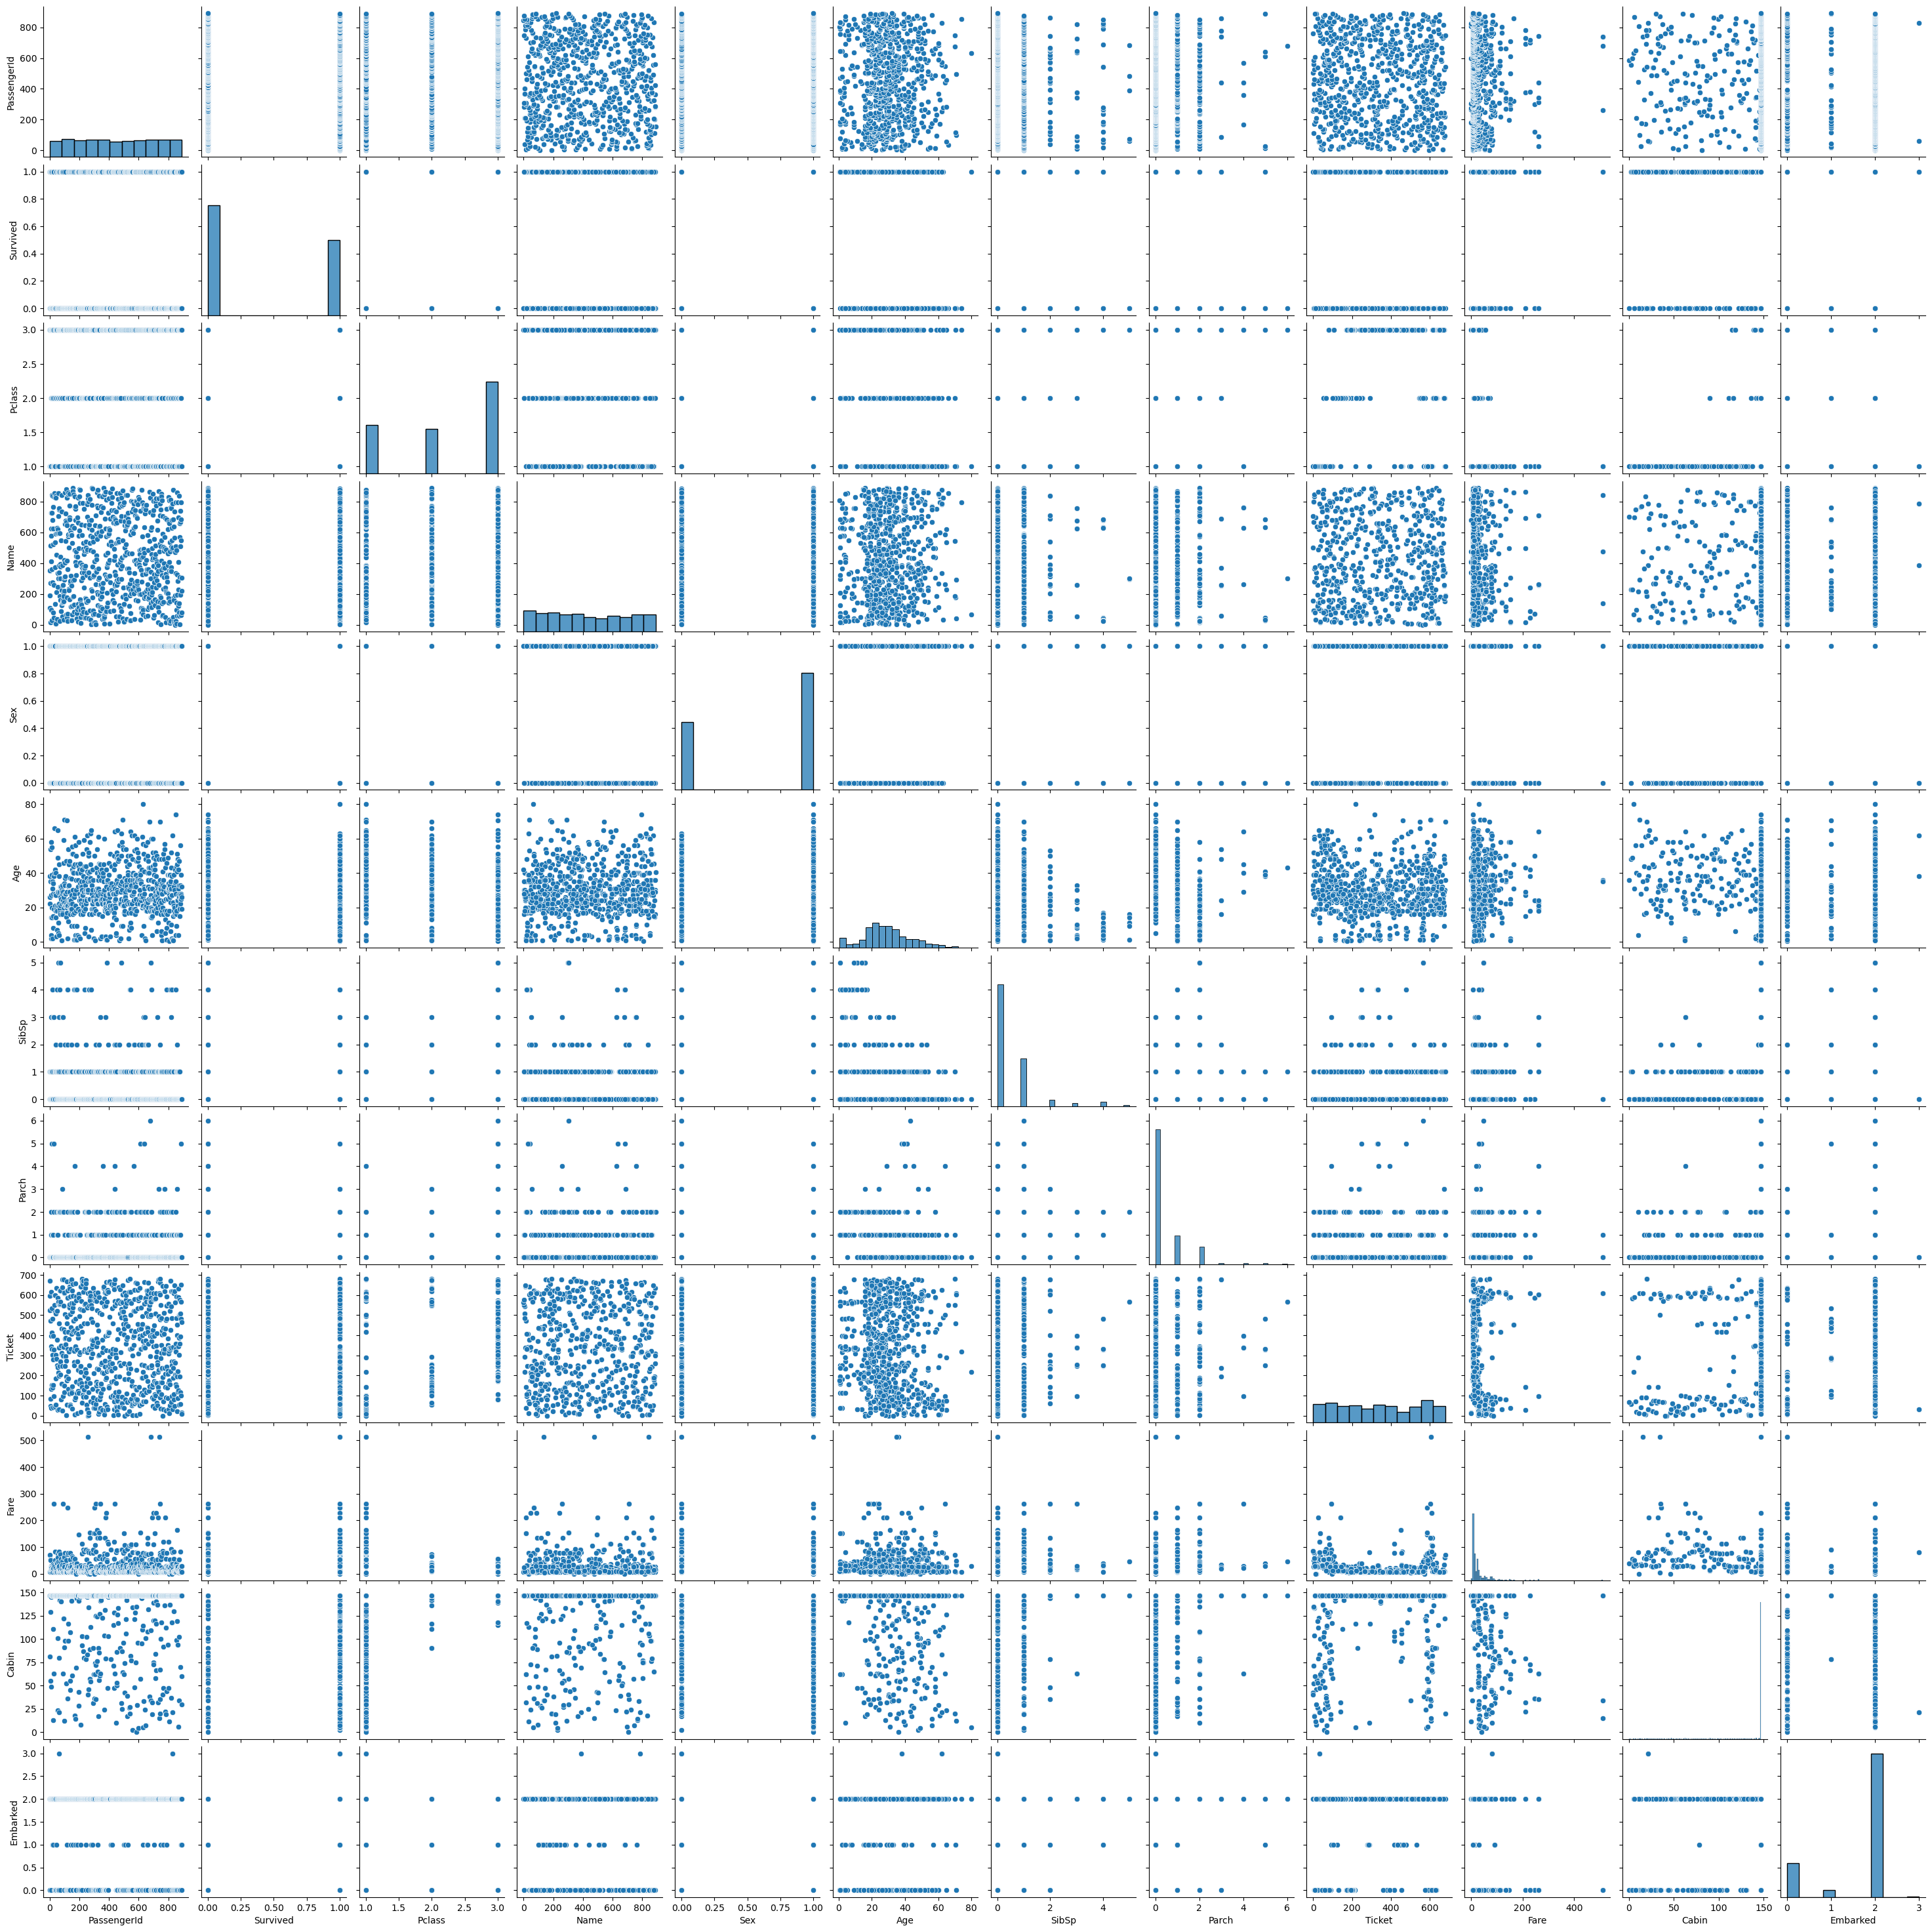

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(Titanic)

In [14]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


# 3.Model Building

In [17]:
X = Titanic.iloc[:, 1:]
y = Titanic.iloc[:, 0]
regresssor = LinearRegression()
regresssor.fit(X,y)
regresssor.score(X,y)

0.4047269791310273

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Logistic regression
classifier = LogisticRegression()
classifier.fit(X,y)
classifier.score(X,y)

0.7927170868347339

In [21]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred_df = pd.DataFrame({'actual': y, 'predicted':y_pred})
y_pred_df.head()

,actual,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [22]:
#Confusion matrix for the model accuracy
confusion_mt = confusion_matrix(y,y_pred)
confusion_mt

array([[367,  57],
       [ 91, 199]], dtype=int64)

In [23]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       424
           1       0.78      0.69      0.73       290

    accuracy                           0.79       714
   macro avg       0.79      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



In [24]:
print('Accuracy:',(367+199)/(367+57+91+199))

Accuracy: 0.7927170868347339


In [25]:
y_pred_prob = classifier.predict_proba(X)[:,1]
y_pred_prob.sum()

280.3196861831531

# 4 Model Evaluation

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y,y_pred)
auc

0.7758864671437866

<function matplotlib.pyplot.show(close=None, block=None)>

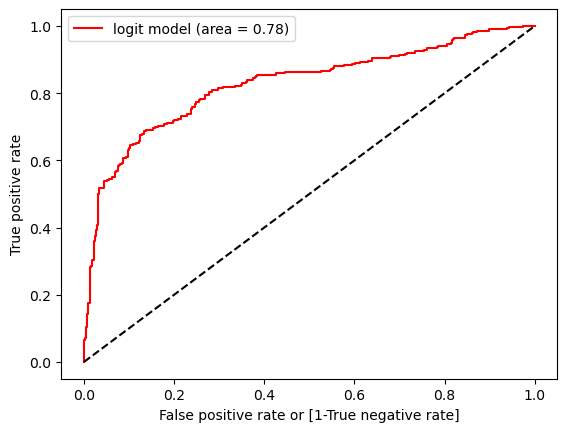

In [27]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True positive rate')
plt.legend()
plt.show